In [3]:
import pandas as pd
import numpy as np
# Converting text messages in data into numerical features within a vector
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [5]:
data = pd.read_csv('spam.csv',encoding='latin-1') # Encoding Because we perform text

In [7]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
# Clean Data
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis= 1,inplace=True)

In [11]:
# Renaming table
data.columns = ['Category','Message']

In [18]:
data.head(8)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Category
ham     4825
spam     747
Name: count, dtype: int64


<Axes: xlabel='Category'>

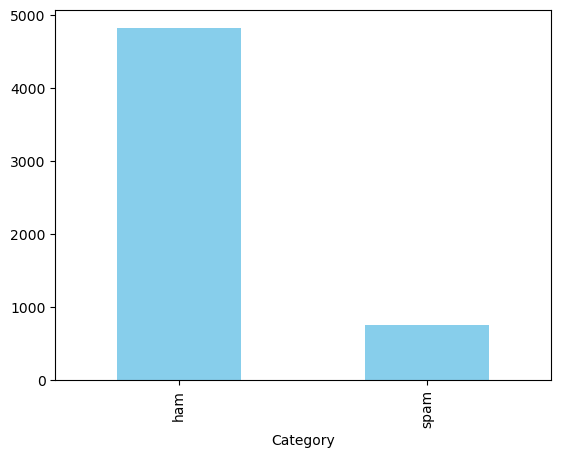

In [23]:
print(data['Category'].value_counts())
data['Category'].value_counts().plot(kind='bar',color='skyblue')

In [29]:
# Add new column 'Spam'
data['Spam'] = data['Category'].apply(lambda x:1 if x =='spam' else 0)

In [30]:
data.columns

Index(['Category', 'Message', 'Spam'], dtype='object')

In [31]:
data.head(10)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [34]:
x = np.array(data['Message'])
y = np.array(data['Spam'])
cv = CountVectorizer()
X = cv.fit_transform(x)
# Random state make code donot make every time randome training
xtrain , xtest , ytrain , ytest = train_test_split(X , y , test_size =0.3,random_state=42)

In [37]:
model = MultinomialNB()
model.fit(xtrain , ytrain)

MultinomialNB()

In [41]:
# Make user test
# England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/ﾌｼ1.20 POBOXox36504W45WQ 16+
sample = input("Enter a message:")
sampleTransform = cv.transform([sample]).toarray()
print(model.predict(sampleTransform))

[1]


In [43]:
model.score(xtest,ytest)*100

97.84688995215312